In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn import tree

randomstate = 0

### Question 1 a)

In [2]:
df = pd.read_csv('/Users/cavin/Desktop/TBA3222 Marketing Analytics Assignment02/gym_customers_binary.csv')

#Summary statistics for the given dataset
df.info()
df.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Subject_ID    403 non-null    int64 
 1   Total_Chol    403 non-null    int64 
 2   HDL           403 non-null    int64 
 3   Age           403 non-null    int64 
 4   Gender        403 non-null    object
 5   Height        403 non-null    int64 
 6   Weight        403 non-null    int64 
 7   Body_Frame    403 non-null    object
 8   Systolic_BP   403 non-null    int64 
 9   Diastolic_BP  403 non-null    int64 
 10  Waist         403 non-null    int64 
 11  Hip           403 non-null    int64 
 12  Membership    403 non-null    object
dtypes: int64(10), object(3)
memory usage: 41.1+ KB


,Subject_ID,Total_Chol,HDL,Age,Gender,Height,Weight,Body_Frame,Systolic_BP,Diastolic_BP,Waist,Hip,Membership
count,403.000000,403.000000,403.000000,403.000000,403,403.000000,403.000000,403,403.000000,403.000000,403.000000,403.000000,403
unique,NaN,NaN,NaN,NaN,2,NaN,NaN,3,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,female,NaN,NaN,medium,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,234,NaN,NaN,191,NaN,NaN,NaN,NaN,331
mean,15978.310174,221.305211,44.761787,46.851117,NaN,65.992556,177.588089,NaN,136.756824,83.200993,37.890819,43.027295,NaN
std,11881.122124,62.744873,11.593352,16.312333,NaN,3.921803,40.290538,NaN,22.653356,13.566376,5.732251,5.658767,NaN
min,1000.000000,150.000000,10.000000,19.000000,NaN,52.000000,99.000000,NaN,90.000000,48.000000,26.000000,30.000000,NaN
25%,4792.500000,183.000000,38.000000,34.000000,NaN,63.000000,151.000000,NaN,121.000000,74.500000,33.000000,39.000000,NaN
50%,15766.000000,203.000000,45.000000,45.000000,NaN,66.000000,173.000000,NaN,136.000000,82.000000,37.000000,42.000000,NaN
75%,20336.000000,232.000000,53.000000,60.000000,NaN,69.000000,200.000000,NaN,146.000000,90.000000,41.000000,46.000000,NaN


In [3]:
dummy_gender = [1 if i=='female' else 0 for i in df.Gender.values]
print(dummy_gender)

dummy_Body_Frame = pd.get_dummies(df['Body_Frame'], prefix='Body_Frame')
print(dummy_Body_Frame.head())

df_new = df.drop(['Subject_ID','Gender','Body_Frame'],axis =1)
df_new = df_new.join(pd.DataFrame(dummy_gender, columns = ['Gender']))
df_new = df_new.join(dummy_Body_Frame[['Body_Frame_medium','Body_Frame_small']])

df_new.head()

[1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 

,Total_Chol,HDL,Age,Height,Weight,Systolic_BP,Diastolic_BP,Waist,Hip,Membership,Gender,Body_Frame_medium,Body_Frame_small
0,150,47,46,62,121,118,59,29,38,No,1,1,0
1,189,53,29,64,218,112,68,46,48,No,1,0,0
2,232,47,58,61,256,190,92,49,57,No,1,0,0
3,199,53,67,67,119,110,50,33,38,No,0,0,0
4,413,44,64,68,183,138,80,44,41,Yes,0,1,0


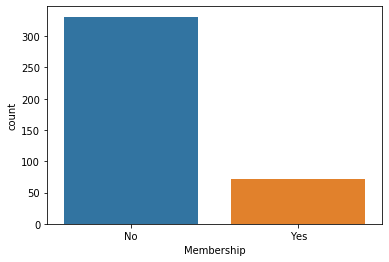

In [4]:
# plot the membership distribution
ax = sns.countplot(x="Membership", data=df_new)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fec2d2c9290>,
      dtype=object)

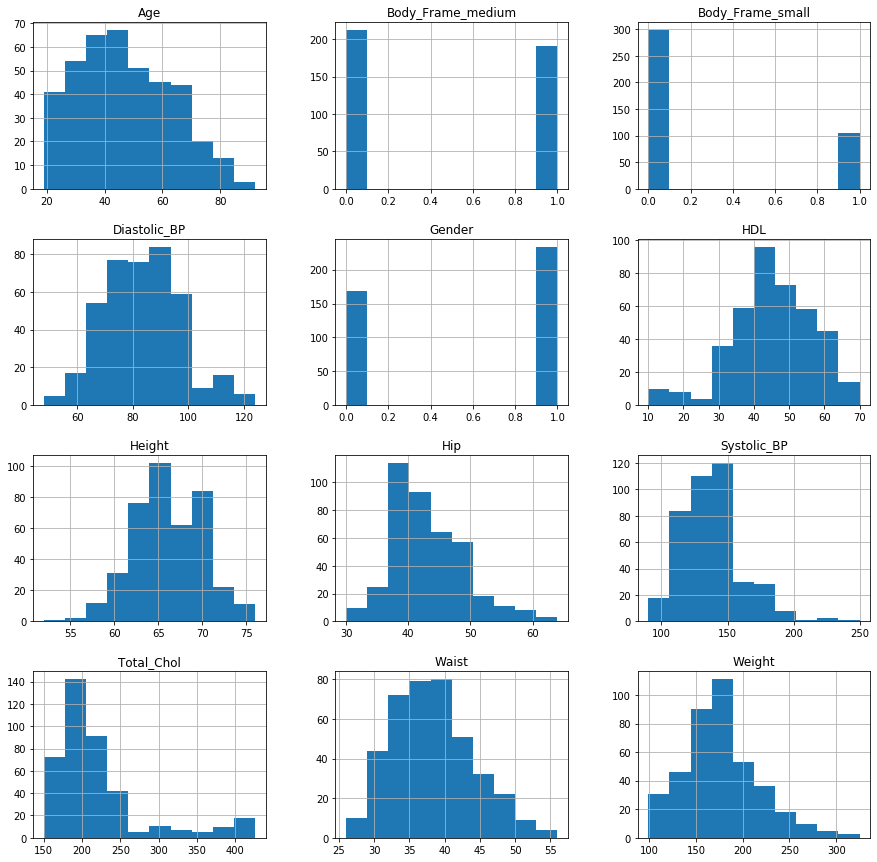

In [5]:
#Plot and show the distributions of all the numeric features.
df_new.hist(figsize=(15, 15))

### 1b)

In [6]:
#b)
#partition dataset to training and testing 
from sklearn.model_selection import train_test_split

df2=df_new.drop(['Membership'],axis=1)

feature_train, feature_test, membership_train, membership_test = train_test_split(df2,pd.DataFrame(df_new['Membership'],columns=['Membership']),test_size=0.30,shuffle=True,random_state=randomstate)

#respective number of customer records in the training and testing set
print('Test record count:',feature_test['Body_Frame_medium'].count(), membership_test.count())
print('Train record count:',feature_train['Body_Frame_medium'].count(), membership_train.count())

Test record count: 121 Membership    121
dtype: int64
Train record count: 282 Membership    282
dtype: int64


### 1c)

In [7]:
#construct a Logistic Regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=randomstate,C=1e9).fit(feature_train, membership_train.Membership.values.ravel())

test_predictions = clf.predict(feature_test)
train_predictions = clf.predict(feature_train)

/Users/cavin/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [8]:
# Use score method to get accuracy of model
test_score = clf.score(feature_test, membership_test)
test_mean_score = np.mean(test_score)
print('Mean Test Accuracy:', test_mean_score)

train_score = clf.score(feature_train, membership_train)
train_mean_score = np.mean(train_score)
print('Mean Train Accuracy:', train_mean_score)

Mean Test Accuracy: 0.9586776859504132
Mean Train Accuracy: 0.9787234042553191


In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix

test_cm = confusion_matrix(membership_test, test_predictions)
train_cm = confusion_matrix(membership_train, train_predictions)

print('Test confution matrix \n',test_cm)
print('Train confution matrix \n',train_cm)

Test confution matrix 
 [[101   3]
 [  2  15]]
Train confution matrix 
 [[226   1]
 [  5  50]]


In [10]:
#Another way to get accuracy
#test accuracy & sensitivity
tn, fp, fn, tp = confusion_matrix(membership_test, test_predictions).ravel()
print('Overall test accuracy:', (tn+tp)/(tn+fp+fn+tp)) 
print('Overall test error:', (fp+fn)/(tn+fp+fn+tp))
print('Test sensitivity (Y=1):', tp/(fn+tp))
print('Test specificity (Y=0):', tn/(tn+fp)) 
print( )

#Train accuracy & sensitivity
tn, fp, fn, tp = confusion_matrix(membership_train, train_predictions).ravel()
print('Overall train accuracy:', (tn+tp)/(tn+fp+fn+tp)) 
print('Overall train error:', (fp+fn)/(tn+fp+fn+tp))
print('Train sensitivity (Y=1):', tp/(fn+tp))
print('Train specificity (Y=0):', tn/(tn+fp))

Overall test accuracy: 0.9586776859504132
Overall test error: 0.04132231404958678
Test sensitivity (Y=1): 0.8823529411764706
Test specificity (Y=0): 0.9711538461538461

Overall train accuracy: 0.9787234042553191
Overall train error: 0.02127659574468085
Train sensitivity (Y=1): 0.9090909090909091
Train specificity (Y=0): 0.9955947136563876


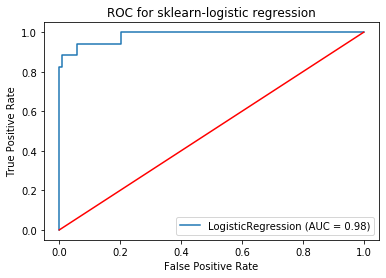

In [11]:
#plot the receiver-operating-characteristics (ROC) curve of the Logistic Regression model

metrics.plot_roc_curve(clf, feature_test, membership_test)
plt.plot(np.linspace(0,1,11),np.linspace(0,1,11),color = 'r')
plt.title('ROC for sklearn-logistic regression')
plt.show()   

/Users/cavin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


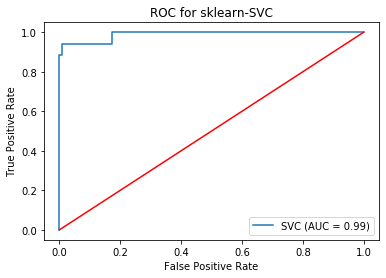

In [12]:
#random model as bench mark 
#using SVC as bench mark 
from sklearn.svm import SVC

clsvm = SVC(random_state=randomstate)
clsvm.fit(feature_train, membership_train)
SVC(random_state=randomstate)
metrics.plot_roc_curve(clsvm, feature_test, membership_test) 
plt.plot(np.linspace(0,1,11),np.linspace(0,1,11),color = 'r')
plt.title('ROC for sklearn-SVC')
plt.show()          

In [13]:
#export to csv
train_set = feature_train.join(membership_train)
test_set = feature_test.join(membership_test)
train_set.to_csv('membership_train_set_sen{0:.3f}_spec{1:.3f}.csv'.format(tp/(fn+tp),tn/(tn+fp)), index=False)
test_set.to_csv('membership_test_set_sen{0:.3f}_spec{1:.3f}.csv'.format(tp/(fn+tp),tn/(tn+fp)), index=False)

### 1d)

In [14]:
# construct stats_LR model with full set of features
import statsmodels.api as sm
# note: as statsmodels LR do not automatically fit a constant, we need to manually add a constant 
logit = sm.Logit([1 if i=='Yes' else 0 for i in membership_train.Membership.values], sm.tools.add_constant(feature_train))

# fit the model
stat_clf = logit.fit()
stat_clf.summary()

Optimization terminated successfully.
         Current function value: 0.053090
         Iterations 13


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  282
Model:                          Logit   Df Residuals:                      269
Method:                           MLE   Df Model:                           12
Date:                Sun, 28 Mar 2021   Pseudo R-squ.:                  0.8924
Time:                        00:29:35   Log-Likelihood:                -14.971
converged:                       True   LL-Null:                       -139.15
Covariance Type:            nonrobust   LLR p-value:                 3.008e-46
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -86.1000     41.740     -2.063      0.039    -167.909      -4.291
Total_Chol            0.3186      0.129      2.464      0.014       0.065       0.572
HDL                  -0.0688      0.057     -1.201      0.230      -0.181       0.043
Age                   0.0470      0.047      1.001      0.317      -0.045       0.139
Height               -0.0326      0.231     -0.141      0.888      -0.485       0.420
Weight               -0.0384      0.043     -0.903      0.366      -0.122       0.045
Systolic_BP          -0.0283      0.035     -0.799      0.425      -0.098       0.041
Diastolic_BP          0.1420      0.085      1.673      0.094      -0.024       0.308
Waist                 0.4989      0.292      1.708      0.088      -0.073       1.071
Hip                  -0.1463      0.215     -0.681      0.496      -0.567       0.275
Gender               -1.6966      1.970     -0.861      0.389      -5.557       2.164
Body_Frame_medium    -1.7618      1.398     -1.260      0.208      -4.503       0.979
Body_Frame_small     -3.6495      2.616     -1.395      0.163      -8.776       1.477
=====================================================================================

Possibly complete quasi-separation: A fraction 0.72 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [21]:
#identify significant feature p-value <0.05
#Total_Chol,Age,Hip,Gender
df_trimed = df_new[['Total_Chol']]
df_trimed.head()

,Total_Chol
0,150
1,189
2,232
3,199
4,413


Mean Test Accuracy: 0.9752066115702479
Mean Train Accuracy: 0.975177304964539
Test confution matrix 
 [[104   0]
 [  3  14]]
Train confution matrix 
 [[227   0]
 [  7  48]]


/Users/cavin/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


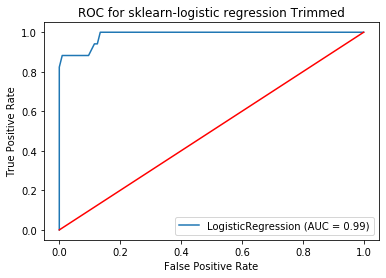

In [23]:
#trimed train test data

trimed_feature_train, trimed_feature_test, trimed_membership_train, trimed_membership_test = train_test_split(df_trimed,pd.DataFrame(df_new['Membership'],columns=['Membership']),test_size=0.30,shuffle=True,random_state=randomstate)

from sklearn.linear_model import LogisticRegression

clf_trimed = LogisticRegression(random_state=randomstate).fit(trimed_feature_train, trimed_membership_train)

trimed_test_predictions = clf_trimed.predict(trimed_feature_test)
trimed_train_predictions = clf_trimed.predict(trimed_feature_train)

# Use score method to get accuracy of model
trimed_test_score = clf_trimed.score(trimed_feature_test, trimed_membership_test)
trimed_test_mean_score = np.mean(trimed_test_score)
print('Mean Test Accuracy:', trimed_test_mean_score)

trimed_train_score = clf_trimed.score(trimed_feature_train, trimed_membership_train)
trimed_train_mean_score = np.mean(trimed_train_score)
print('Mean Train Accuracy:', trimed_train_mean_score)

trimed_test_cm = confusion_matrix(trimed_membership_test, trimed_test_predictions)
trimed_train_cm = confusion_matrix(trimed_membership_train, trimed_train_predictions)

print('Test confution matrix \n',trimed_test_cm)
print('Train confution matrix \n',trimed_train_cm)

#plot the receiver-operating-characteristics (ROC) curve of the Logistic Regression model

metrics.plot_roc_curve(clf_trimed, trimed_feature_test, trimed_membership_test)
plt.plot(np.linspace(0,1,11),np.linspace(0,1,11),color = 'r')
plt.title('ROC for sklearn-logistic regression Trimmed')
plt.show()

In [17]:
#test accuracy & sensitivity
tn_trimed, fp_trimed, fn_trimed, tp_trimed = confusion_matrix(trimed_membership_test, trimed_test_predictions).ravel()
print('Overall test accuracy:', (tn_trimed+tp_trimed)/(tn_trimed+fp_trimed+fn_trimed+tp_trimed)) 
print('Overall test error:', (fp_trimed+fn_trimed)/(tn_trimed+fp_trimed+fn_trimed+tp_trimed))
print('Test sensitivity (Y=1):', tp_trimed/(fn_trimed+tp_trimed))
print('Test specificity (Y=0):', tn_trimed/(tn_trimed+fp_trimed)) 
print( )

#Train accuracy & sensitivity
tn_trimed, fp_trimed, fn_trimed, tp_trimed = confusion_matrix(trimed_membership_train, trimed_train_predictions).ravel()
print('Overall train accuracy:', (tn_trimed+tp_trimed)/(tn_trimed+fp_trimed+fn_trimed+tp_trimed)) 
print('Overall train error:', (fp_trimed+fn_trimed)/(tn_trimed+fp_trimed+fn_trimed+tp_trimed))
print('Train sensitivity (Y=1):', tp_trimed/(fn_trimed+tp_trimed))
print('Train specificity (Y=0):', tn_trimed/(tn_trimed+fp_trimed))

Overall test accuracy: 0.9752066115702479
Overall test error: 0.024793388429752067
Test sensitivity (Y=1): 0.8235294117647058
Test specificity (Y=0): 1.0

Overall train accuracy: 0.9787234042553191
Overall train error: 0.02127659574468085
Train sensitivity (Y=1): 0.8909090909090909
Train specificity (Y=0): 1.0


### 1e)

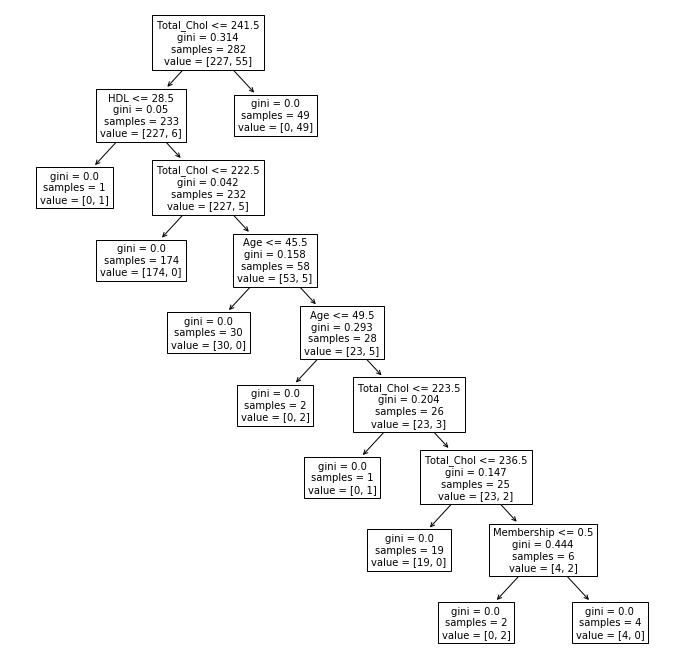

In [25]:
#Create the CART object and train using the training set
cart = tree.DecisionTreeClassifier()
cart = cart.fit(feature_train, membership_train)

# plot tree
feature_list = ['Total_Chol','HDL','Age','Height','Weight','Systolic_BP','Diastolic_BP','Waist','Hip','Membership','Gender','Body_Frame_medium','Body_Frame_small']

plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
tree.plot_tree(cart, fontsize=10,label='all',feature_names = feature_list)
plt.show()

In [19]:

cart_test_predictions = cart.predict(feature_test)
cart_train_predictions = cart.predict(feature_train)

# Use score method to get accuracy of model
cart_test_score = cart.score(feature_test, membership_test)
cart_test_mean_score = np.mean(cart_test_score)
print('CART Mean Test Accuracy:', cart_test_mean_score)

cart_train_score = cart.score(feature_train, membership_train)
cart_train_mean_score = np.mean(cart_train_score)
print('CART Mean Train Accuracy:', cart_train_mean_score)

#confusion matrix
cart_test_cm = confusion_matrix(membership_test, cart_test_predictions)
cart_train_cm = confusion_matrix(membership_train, cart_train_predictions)

print('CART Test confution matrix \n',cart_test_cm)
print('CART Train confution matrix \n',cart_train_cm)

CART Mean Test Accuracy: 0.9669421487603306
CART Mean Train Accuracy: 1.0
CART Test confution matrix 
 [[102   2]
 [  2  15]]
CART Train confution matrix 
 [[227   0]
 [  0  55]]


In [20]:
#test accuracy & sensitivity
tn_cart, fp_cart, fn_cart, tp_cart = confusion_matrix(membership_test, cart_test_predictions).ravel()
print('Overall test accuracy:', (tn_cart+tp_cart)/(tn_cart+fp_cart+fn_cart+tp_cart)) 
print('Overall test error:', (fp_cart+fn_cart)/(tn_cart+fp_cart+fn_cart+tp_cart))
print('Test sensitivity (Y=1):', tp_cart/(fn_cart+tp_cart))
print('Test specificity (Y=0):', tn_cart/(tn_cart+fp_cart)) 
print( )

#Train accuracy & sensitivity
tn_cart, fp_cart, fn_cart, tp_cart = confusion_matrix(membership_train, cart_train_predictions).ravel()
print('Overall train accuracy:', (tn_cart+tp_cart)/(tn_cart+fp_cart+fn_cart+tp_cart)) 
print('Overall train error:', (fp_cart+fn_cart)/(tn_cart+fp_cart+fn_cart+tp_cart))
print('Train sensitivity (Y=1):', tp_cart/(fn_cart+tp_cart))
print('Train specificity (Y=0):', tn_cart/(tn_cart+fp_cart))

Overall test accuracy: 0.9669421487603306
Overall test error: 0.03305785123966942
Test sensitivity (Y=1): 0.8823529411764706
Test specificity (Y=0): 0.9807692307692307

Overall train accuracy: 1.0
Overall train error: 0.0
Train sensitivity (Y=1): 1.0
Train specificity (Y=0): 1.0
